In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
data = pd.read_csv('water.csv')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [10]:
data.drop(data.columns[[0]], axis='columns', inplace = True)
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


<AxesSubplot:title={'center':'Зависимость смертности от жесткости воды'}, xlabel='hardness', ylabel='mortality'>

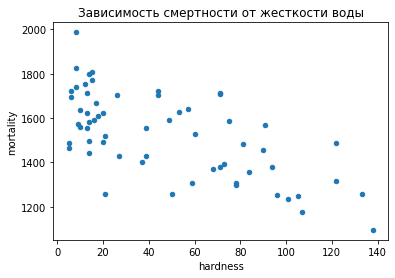

In [11]:
data.plot(kind='scatter', x='hardness', y='mortality', title = 'Зависимость смертности от жесткости воды')

In [12]:
data.corr() #коффициент корреляции Пирсона

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [15]:
data.corr(method='spearman') #коэффициент корреляции Спирмена

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Для обоих коэффициентов наблюдаем обратную корреляцию средней силы.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
X = data[['hardness']]
y = data[['mortality']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [20]:
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [21]:
model.coef_ # y = (A)*x + b

array([[-3.14027013]])

In [22]:
model.intercept_ ##y = a*x + (B)

array([1668.51447487])

In [23]:
y_pred = model.predict(X_test)
y_pred

array([[1615.12988263],
       [1649.67285408],
       [1640.25204369],
       [1546.04393974],
       [1514.64123843],
       [1445.55529554],
       [1414.15259422],
       [1351.34719159],
       [1637.11177355],
       [1250.85854739],
       [1432.99421501],
       [1235.15719673],
       [1285.40151883],
       [1285.40151883],
       [1643.39231382],
       [1423.57340462]])

In [24]:
model.score(X_test, y_test) #коэффициент детерминации

0.686501375700894

Коэффициент существенно больше нуля, следовательно модель хорошо справляется с объяснением зависимости между данными.

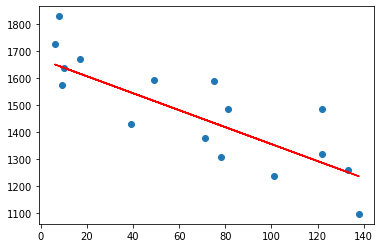

In [25]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [26]:
resid = y_pred - y_test
resid #график остатков

,mortality
1,-52.870117
36,-74.327146
23,66.252044
17,118.043940
44,-76.358762
60,67.555296
59,-70.847406
41,115.347192
8,0.111774
34,-8.141453


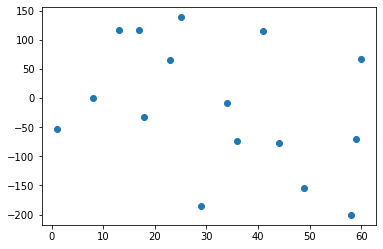

In [27]:
plt.scatter(resid.index, resid)

Остатки рандомны, что говорит о хорошем качестве модели.

In [30]:
data_south = data[data.location=='South']
data_south.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [31]:
data_north = data[data.location=='North']
data_north.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


<AxesSubplot:title={'center':'Зависимость смертности от жесткости воды в Южных городах'}, xlabel='hardness', ylabel='mortality'>

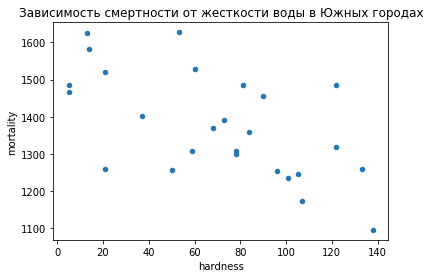

In [33]:
data_south.plot(kind='scatter', x='hardness', y='mortality', title = 'Зависимость смертности от жесткости воды в Южных городах')

<AxesSubplot:title={'center':'Зависимость смертности от жесткости воды в Северных городах'}, xlabel='hardness', ylabel='mortality'>

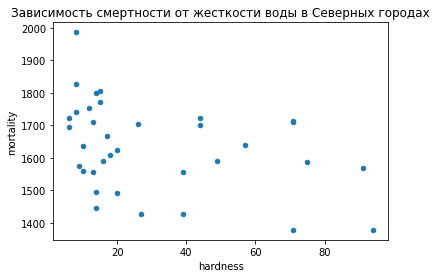

In [34]:
data_north.plot(kind='scatter', x='hardness', y='mortality', title = 'Зависимость смертности от жесткости воды в Северных городах')

In [39]:
data_south.corr() #коффициент корреляции Пирсона в Южных городах

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [40]:
data_north.corr() #коффициент корреляции Пирсона в Северных городах

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [41]:
data_south.corr(method='spearman') #коэффициент корреляции Спирмена в Южных городах

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [42]:
data_north.corr(method='spearman') #коэффициент корреляции Спирмена в Северных городах

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


При разделении городов на две группы результаты анализа принципиально не изменились: так же наблюдаем отрицательные коэффициенты корреляции, так же средней силы, хоть и менее выраженные.

In [44]:
#линейная регрессия, Южные города
X = data_south[['hardness']]
y = data_south[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
model = LinearRegression()
model.fit(X_train, y_train) 

LinearRegression()

In [45]:
print('y = (A)*x + b :',model.coef_[0][0])
print('y = a*x + (B) :', model.intercept_[0])
y_pred = model.predict(X_test)

y = (A)*x + b : -2.5277135335754357
y = a*x + (B) : 1543.8699342128266


In [49]:
print('Коэффициент детерминации:', model.score(X_test, y_test))

Коэффициент детерминации: 0.17659579522823177


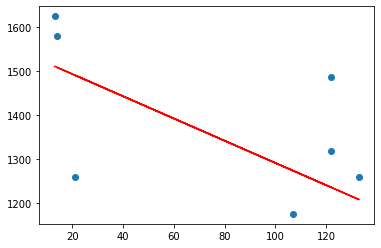

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

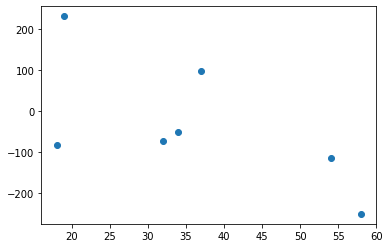

In [51]:
resid = y_pred - y_test
resid #график остатков
plt.scatter(resid.index, resid)

In [53]:
#линейная регрессия, Северные города
X = data_north[['hardness']]
y = data_north[['mortality']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=50)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
print('y = (A)*x + b :',model.coef_[0][0])
print('y = a*x + (B) :', model.intercept_[0])
y_pred = model.predict(X_test)

y = (A)*x + b : -1.573877711749123
y = a*x + (B) : 1676.276770244147


In [55]:
print('Коэффициент детерминации:', model.score(X_test, y_test))

Коэффициент детерминации: 0.1825953672054048


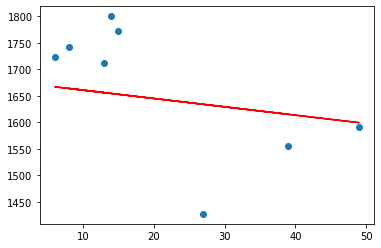

In [56]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

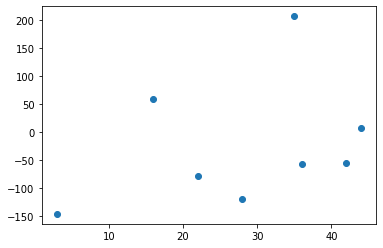

In [57]:
resid = y_pred - y_test
resid #график остатков
plt.scatter(resid.index, resid)

Наблюдаем низкие коэффициенты детерминации при рассмотрении Южных и Северных городов, как двух отдельных груп. Следовательно, созданная модель линейной регрессии плохо описывает данные.